<!-- vscode-jupyter-toc -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->
<a id='toc0_'></a>**Содержание**    
- [Наибольшая возрастающая подпоследовательность](#toc1_)    
- [Расстояние редактирования (editing distance)](#toc2_)    
- [Задача о рюкзаке (вариант, когда нельзя брать часть предмета)](#toc3_)    
- [Перемножение последовательности матриц](#toc4_)    
- [Независимые множества в деревьях](#toc5_)    
- [Общие принципы](#toc6_)    
- [+ Практика: Расстояние редактирования](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	minLevel=1
	maxLevel=1
	/vscode-jupyter-toc-config -->
<!-- /vscode-jupyter-toc -->

## Динамическое программирование: на примере числа Фибоначчи

Вместо исходной задачи решается множествоперекрывающихся подзадач.   
Ответы для подзадачхранятся в таблице.  
Динамическое программирование назад (или сверхувниз): рекурсивно от больших задач к меньшим.  
Динамическое программирование вперёд (или снизувверх): итеративно от меньших задач к большим.  
Для некоторых задач можно уменьшить используемуюпамять, проанализировав структуру таблицы.  

Для Фибоначчи рекурсивное вычисление очень не эффективно, одни и те же узлы вычисляются по несколько раз. Нужно использовать:
### -> динамическое программирование назад (динамическое программирование сверху вниз, мемоизация, "ленивое вычисление")

	Инициализация F[0..n] = [−1,−1,..,−1] 
	Функция FibTD(n)  # TD - top-down
	если F[n] = −1:   # если нет в таблице, то рекурсивно вычислить и положить в таблицу
		если n≤1:  
			F[n]←n  
		иначе:  
			F[n]←FibTD(n−1) + FibTD(n−2)  
	вернуть F[n]      # вернуть из таблицы

Суть: все что вычисляется рекурсивно - сохранятеся в таблицу, если потом понадобится, то не вычислять, а брать готовое. Сам алгоритм не менятеся.
Занимает O(n2)

### -> динамическое программирование вперед (снизу вверх, bottom-up)

	Функция FibBU(n)  
	создать массив F[0..n] 
	F[0]←0,F[1]←1  
	для i от 2 до n:  
		F[i]←F[i−1]+F[i−2]
	вернутьF[n]

Суть: вообще без рекурсии, просто выполняем формулу. Занимает O(n2)

### -> уменьшение памяти

Суть: без массива, без рекурсии, просто храним предыдущее и текущее, в которых накапливаем результат. Занимает O(n2)

In [1]:
def fib(n):  # многочисленные лишние рекурсии fib(n - 1)
    return 0 if n == 1 else 1 if n == 2 else fib(n - 1) + fib(n - 2)


def fibTD(n):  # запоминаем результаты вызовов, чтоб не делать лишнюю рекурсию
    F = [-1] * n
    if F[n-1] == -1:
        if n <= 2:
            F[n-1] = n - 1
        else:
            F[n-1] = fibTD(n - 1) + fibTD(n - 2)
    return F[n-1]


def fibBU(n):  # запоминаем все вызовы, вообще без рекурсии 
    F = [0] * max(n, 2)
    F[0], F[1] = 0, 1
    for i in range(2, n):
        F[i] = F[i-1] + F[i - 2]
    return F[n-1]


def fib_lol(n):  # запоминаем только реально нужные вызовы
    f0, f1 = 0, 1
    if n > 1:
        for i in range(2, n):
            f1, f0 = f1 + f0, f1
        return f1
    else:
        return f1 if n == 2 else f0


fib 12188
fibTD 35290
fibBU 1402
fib_lol 644


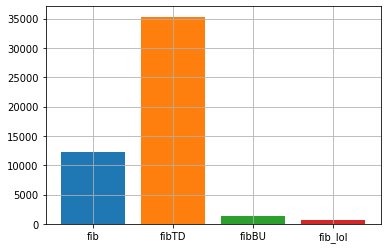

In [2]:
from time import perf_counter_ns
from matplotlib import pyplot as plt

def timeit(func, *args, n_iter=100):
    t1 = float('inf')
    for _ in range(n):
        t0 = perf_counter_ns()
        func(*args)
        t1 = min(t1, perf_counter_ns() - t0)
    return t1

n = 10
funcs = [fib, fibTD, fibBU, fib_lol]

for func in funcs:
    t = timeit(func, n)
    print(func.__name__, t)
    plt.bar(func.__name__, t)
plt.grid(True)
plt.show()


# <a id='toc1_'></a>[Наибольшая возрастающая подпоследовательность](#toc0_)

	Функция LISBottomUp(A[1..n]) # longest increasing subsequence  
	создать массив D[1..n]  
	для i от 1 до n:  
		D[i]←1  
		для j от 1 до i−1:  
			если A[j]<A[i] и D[j]+1>D[i]:  
				D[i]←D[j]+1  
	ans←0  
	для i от 1 до n:  
		ans←max(ans,D[i])  
	вернуть ans

Чтобы была возможность восстановить сами последовательности надо сохранять индекс предыдущего элемента этой оптимальной последовательности. Тогда можно пройти по двум массивам и восстановить оптимальную последовательность:

	Функция LISBottomUp2(A[1..n])  
	создать массивы D[1..n], prev[1..n]
	для i от 1 до n:  
		D[i]←1, prev[i]←1
		для j от 1 до i−1:  
			если A[j]<A[i] и D[j]+1>D[i]:  
				D[i]←D[j]+1, prev[i]←j   
	ans←0  
	для i от 1 до n:  
		ans←max(ans,D[i])  
	вернуть ans

	Восстановление ответа  
	создать массив L[1..ans] {индексы НВП}  
	k←1
	для i от 2 до n:  
		если D[i]>D[k]:  
			k←i  
	j←ans  
	пока k>0:
		L[j]←k  
		j←j−1  
		k←prev[k]  

Время работы O(n)

Можно восстановить и без prev. Идем по D до элемента на 1 меньше (для МВП в A в D всегда будет 1,2,3,4...), если соответствующий эл-т A меньше, то это он и есть. Повторяем шаги.

## Задача на программирование: наибольшая последовательнократная подпоследовательность

Дано целое число 1≤n≤10\^3 и массив A\[1..n] натуральных чисел, не превосходящих 2*10\^9. Выведите максимальное 1≤k≤n, для которого найдётся подпоследовательность 1≤i1<i2<…<ik≤n длины k, в которой каждый элемент делится на предыдущий (формально: для  всех 1≤j<k: A\[ij] % A\[ij+1] == 0).

In [3]:
INPUTS = """4
3 6 7 12"""

In [4]:
reader = (line for line in INPUTS.split('\n'))
n = int(next(reader))
A = list(map(int, next(reader).split()))

    
def LCSBottomUp(A):  # longest common subsequence
    n = len(A)
    D = [0] * n
    for i in range(n):
        D[i] = 1
        for j in range(i):
            if (A[i] % A[j] == 0) and (D[j] + 1 > D[i]):
                D[i] = D[i] + 1
    ans = 0
    for i in range(n):
        ans = max(ans, D[i])
    return ans


print(LCSBottomUp(A))

def test():
    assert LCSBottomUp([]) == 0
    assert LCSBottomUp([1,2]) == 2
    assert LCSBottomUp([1,2,4]) == 3
    
test()

3


## Задача на программирование повышенной сложности: наибольшая невозрастающая подпоследовательность

Дано целое число 1≤n≤10\^5 и массив A[1…n], содержащий неотрицательные целые числа, не превосходящие 10\^9. Найдите наибольшую невозрастающую подпоследовательность в A. В первой строке выведите её длину k, во второй — её индексы 1≤i1<i2<…<ik≤n (таким образом, A[i1]≥A[i2]≥…≥A[in]).

In [5]:
INPUTS = """5
5 3 4 4 2"""

In [6]:
reader = (line for line in INPUTS.split('\n'))
n = int(next(reader))
A = list(map(int, next(reader).split()))

    
def LNIS(A, LNIS=True):  # longest not increasing subsequence
    n = len(A)
    D = [0] * n
    
    for i in range(n):
        D[i] = 1
        for j in range(i):
            if ((A[j] >= A[i]) if LNIS else (A[j] < A[i])) and (D[j] + 1 > D[i]):   
            # условие D[j]+1>D[i] чтоб пропустить повторные значения D[j] добавлять 1 только при увеличении
                D[i] = D[i] + 1
    ans = 0
    for i in range(n):
        ans = max(ans, D[i])
    
    return ans, D


def LNISback(k, D, A):
    n = len(D)
    I = [0] * k

    ki = 0
    for i in range(n):
        if D[i] == k:
            ki = i + 1  # 1-base
    
    prevD, prevA = k, A[ki - 1]
    I[k-1] = ki    
    for i in range(ki-1, -1, -1):
        if (D[i] == prevD - 1) and A[i] >= prevA: 
            I[D[i]-1] = i + 1   # 1-base
            prevD, prevA = D[i], A[i]

    return I

k, D = LNIS(A)
print(k)
print(' '.join(map(str, LNISback(k, D, A))))

4
1 3 4 5


In [7]:
def lol(A):
    n = len(A)
    P = [0] * n         # P(i) предыдущий эл-т макс. посл-ти, приходящей в A[i] 
    M = [-1] * (n + 1)  # M(i) индекс в A: в A[M[i]] приходит макс. посл-ть длины j
    
    L = 0   # longest found sequence
    for i in range(n):
        lo = 1
        hi = L
        while lo <= hi:
            mid = (lo + hi) // 2
            if A[M[mid]] >=A[i]:
                lo = mid + 1
            else:
                hi = mid - 1

        newL = lo   # lo = max j ≤ L: A[M[j]] <= A[i]
    
        P[i] = M[newL-1]
        M[newL] = i
        
        if newL > L:
            L = newL    # new longest found sequence
    
    S = [0] * L
    k = M[L]
    for i in range(L - 1, -1, -1):
        S[i] = k + 1 #A[k]
        k = P[k]
    
    print(L)
    return S

reader = (line for line in INPUTS.split('\n'))
n = int(next(reader))
A = list(map(int, next(reader).split()))

list(map(lambda x: print(x, end=' '), lol(A)))

4
1 3 4 5 

[None, None, None, None]

# <a id='toc2_'></a>[Расстояние редактирования (editing distance)](#toc0_)
это минимальное количество вставок, удалений изамен символов, необходимое дляпреобразования A в B. Данное число называется расстоянием редактирования или расстоянием Левенштейна.


### Мемоизация (дин. прог. сверху вниз)
	создать двумерный массив D[0..n,0..m]  
	инициализировать все ячейки значением ∞  
	  
	Функция EditDistTD(i,j)  
	если D[i,j] = ∞:  
		если i = 0: D[i,j]←j  
		иначе если j = 0: D[i,j]←i  
		иначе:  
			ins←EditDistTD(i,j−1) + 1  # предыдущий префикс уже оптимальный, прибавляем единицу на действие вставки
			del←EditDistTD(i−1,j) + 1  # -''- на действие удаления
			sub←EditDistTD(i−1,j−1) + diff(A[i],B[j])  # -''- если нужна замена
			D[i,j]←min(ins,del,sub) # в ответ идет минимальное действие, сохраняющее оптимальность
	вернуть D[i,j]  

### Дин. прог. сверху вниз)
	Функция EditDistBU(A[1..n], B[1..m])  # итеративный, без рекурсии
	создать массив D[0..n,0..m]  
	для i от 0 до n:  
		D[i,0]←i  # макс.возм.расстояния
	для j от 0 до m:  
		D[0,j]←j  # макс.возм.расстояния
	для i от 1 до n:  
		для j от 1 до m:  
			c←diff(A[i],B[j])
			D[i,j]←min(D[i−1,j]+1,D[i,j−1]+1,D[i−1,j−1]+c)  
	вернутьD[n,m]  

+1, +1, +diff(A[i],B[j]) можно заменить на функции стоимости вставки inscost(B[j]), удаления delcost(A[i]), замены substcost(A[i], B[j]), будет найдено оптимальное расстояние для взвешенного редактирования

## Задача на программирование: расстояние редактирования

Вычислите расстояние редактирования двух данных непустых строк длины не более 10^2, содержащих строчные буквы латинского алфавита.

In [8]:
INPUTS = """ab
ab"""
INPUTS = """short
ports123"""

In [9]:
A = INPUTS.split('\n')[0]
B = INPUTS.split('\n')[1]


def editDistBU(A, B):
    n, m = len(A), len(B)
    D = [[0]*(m + 1) for j in range(n + 1)]
    
    for i in range(n+1):
        D[i][0] = i
    for j in range(m+1):
        D[0][j] = j
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            c = 0 if A[i-1] == B[j-1] else 1
            D[i][j] = min(D[i - 1][j] + 1, D[i][j - 1] + 1, D[i - 1][j - 1] + c)
    return D #D[n][m] 

A, B, editDistBU(A, B)


('short',
 'ports123',
 [[0, 1, 2, 3, 4, 5, 6, 7, 8],
  [1, 1, 2, 3, 4, 4, 5, 6, 7],
  [2, 2, 2, 3, 4, 5, 5, 6, 7],
  [3, 3, 2, 3, 4, 5, 6, 6, 7],
  [4, 4, 3, 2, 3, 4, 5, 6, 7],
  [5, 5, 4, 3, 2, 3, 4, 5, 6]])

# <a id='toc3_'></a>[Задача о рюкзаке (вариант, когда нельзя брать часть предмета)](#toc0_)
Вход: веса w1..wn ∈ N и стоимости c1..cn ∈ N данных n предметов; вместимость рюкзака W ∈ N.  
Выход: максимальная стоимость предметов суммарного веса не более W.  
Варианты: 1. Рюкзак с повторениями: неограниченное количество каждого из предметов. 2. Рюкзак без повторений: единственный экземпляр каждого предмета. 

	Функция KnapsackWithRepsBU(W,w1..wn,c1..cn)  	# с повторениями
	создать массив D[0..W] = [0..0]  
	для w от 1 до W:  
		для i от 1 до n:  
			если wi≤w:  
				D[w]←max(D[w],D[w−wi] +ci)  
	вернутьD[W]


	KnapsackWithoutRepsBU(W,w1..wn,c1..cn)	# без повторений
	создать массив D[0..W,0..n]  
	для w от 0 до W:  
		D[w,0]←0  
	для i от 0 до n:  
		D[0,i]←0  
	для i от 1 до n:  
		для w от 1 до W:  
			D[w,i]←D[w,i−1]  
			если wi≤w:  
				D[w,i] = max(D[w,i],D[w−wi,i−1] + ci)  
	вернуть D[W,n]  


## Задача на программирование: рюкзак
Первая строка входа содержит целые числа 1≤W≤10\^4 и 1≤n≤300 — вместимость рюкзака и число золотых слитков. Следующая строка содержит n целых чисел 0≤w1..wn≤10\^5, задающих веса слитков. Найдите максимальный вес золота, который можно унести в рюкзаке.

In [10]:
INPUTS = """16 5
8 4 1 2 5"""

In [11]:
W, n = list(map(int, INPUTS.split('\n')[0].split()))
Wn = list(map(int, INPUTS.split('\n')[1].split()))

def knapsackWoRepsBU(W, n, Wn):
    # C[i] == W[i]
    D = [[0]*(n + 1) for j in range(W + 1)]     # D = [[1..n] * W] <=> D[w][i]
    
    for i in range(1, n+1):
        for w in range(1, W+1):
            D[w][i] = D[w][i - 1]
            if Wn[i - 1] <= w:
                D[w][i] = max(D[w][i], D[w - Wn[i - 1]][i - 1] + Wn[i - 1]) 
                
    return D 

def unpack(D, Wn):
    # если вес изменился, значит предмет задействован, ищем в следующей строке, 
    # начиная со сдвига на стоимость последнего исп. предмета 
    
    wi = [0] * len(Wn)
    n = len(D[-1]) - 1
    w = len(D) - 1
    
    # сука индексы
    i, dw = 0, 0
    while i < n:
        if D[-1-dw][-i] > D[-1-dw][-i-1]:
            wi[-i+1]= Wn[-i+1]
            dw = Wn[-i]
        else: dw = 0
        i = i + 1
            
    return wi

print(knapsackWoRepsBU(W, n, Wn)[-1][-1])
print(unpack(knapsackWoRepsBU(W, n, Wn), Wn))
print(sum(unpack(knapsackWoRepsBU(W, n, Wn), Wn)) == knapsackWoRepsBU(W, n, Wn)[-1][-1])

knapsackWoRepsBU(W, n, Wn)

16
[8, 0, 1, 2, 5]
True


[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 2, 2],
 [0, 0, 0, 1, 3, 3],
 [0, 0, 4, 4, 4, 4],
 [0, 0, 4, 5, 5, 5],
 [0, 0, 4, 5, 6, 6],
 [0, 0, 4, 5, 7, 7],
 [0, 8, 8, 8, 8, 8],
 [0, 8, 8, 9, 9, 9],
 [0, 8, 8, 9, 10, 10],
 [0, 8, 8, 9, 11, 11],
 [0, 8, 12, 12, 12, 12],
 [0, 8, 12, 13, 13, 13],
 [0, 8, 12, 13, 14, 14],
 [0, 8, 12, 13, 15, 15],
 [0, 8, 12, 13, 15, 16]]

In [12]:
L = [1,2,3,4,5,6,7]
L[-3]

5

# <a id='toc4_'></a>[Перемножение последовательности матриц](#toc0_)
Вход: последовательность n матриц A1..An, которые нужно перемножить.  
Выход: порядок умножения, минимизирующий стоимость умножения.  
(A*B != B*A, НО A*(B*C) == (A*B)*C)  
Стоимость умножения pqr, или n**3 для квадратных. Хотя есть алгоритмы более быстрые, функцию стоимости тут берем так.  
Скобки задают фактически двоичное дерево.  
	D[i,j] = мин. стоимость вычисления Ai×Ai+1×. . .×Aj  
	D[i,j] =min(i≤k<j){D[i,k] + D[k+1,j] + mi−1·mk·mj}  # рекурр. соотн. (минимум ст-ти внутри двух поддеревьев плюс ст-ти их перемножения)


	Инициализация  
		создать таблицу D[1..n,1..n]←[∞..∞]  
	Функция MatrixMultTD(i,j)	
	если D[i,j] = ∞:	
		если i=j: D[i,j]←0	
		иначе:	
			для k от i до j−1:	
				ℓ←MatrixMultTD(i,k)	
				r←MatrixMultTD(k+1,j)	
				D[i,j]←min(D[i,j], ℓ+r+mi−1mkmj)	
	вернуть D[i,j]	

Или итеративно (идем по диагоналям выше главной):

	Функция MatrixMultBU(m0,m1..mn)	
	создать массив D[1..n,1..n]←[∞..∞]	
	для i от 1 до n:	
		D[i,i]←0	
	для s от 1 до n−1:	
		для i от 1 до n−s:	
			j←i+s	
			для k от i до j−1:	
				D[i,j]←min(D[i,j],D[i,k] +D[k+1,j] +mi−1mkmj)	
	вернуть D[1,n]	



# <a id='toc5_'></a>[Независимые множества в деревьях](#toc0_)
Максимальное по весу независимое множество вдереве	
Вход:дерево в весами на вершинах.	
Выход:независимое множество (множество несоединённых друг с другом вершин) максимального суммарного веса.	
Если D\[v]— максимальный вес независимого множества вподдереве с корнем вv, то рекуррентное соотношение:	
	D\[v] = max {w(v) + ∑︁по внукам D\[w], ∑ по детям D\[w]}


	Функция MaxIndSetTD(v)	
	если D[v] = ∞:	
		если у v нет детей:	
			D[v] ← w(v)	
		иначе:	
			m1 ← w(v)	
			для всех детей u вершины v:	
				для всех детей w вершины u:	
					m1 ← m1 + MaxIndSetTD(w)	
			m0←0	
			для всех детей u вершины v:	
				m0 ← m0 + MaxIndSetTD(u)
		D[v] ← max(m1, m0)	
	вернуть D[v]	

Время работы O(|T|) 

# <a id='toc6_'></a>[Общие принципы](#toc0_)
-> Проанализировать структуру оптимального решения,чтобы определить подзадачи и рекуррентное соотношение на них.	
-> Преобразовать рекуррентное соотношение врекурсивный алгоритм, обернув его мемоизацией и решая подзадачи сверху вниз, от больших к меньшим.	
-> Преобразовать рекурсивный алгоритм в итеративный, решая подзадачи снизу вверх, от меньших к большим.	
-> Доказать оценку на время работы и используемуюпамять.	
-> Восстановить оптимальное решение.	
-> Проанализировать структуры таблицы и рекурсивных вызовов, чтобы понять, нельзя ли сэкономить память.	

## Подзадачи: обзор
1 Числа Фибоначии: D\[i] =Fi.	
2 Наибольшая возрастающая подпоследовательность: D\[i]— длина НВП, заканчивающейся в A\[i].	
3 Расстояние редактирование: D\[i,j] — расстояние между A\[1..i] и B\[1..j].	
4 Рюкзак: D\[w]— оптимальная стоимость заполнения рюкзака вместимости w.		
5 Перемножение последовательности матриц: D\[i,j]—стоимость вычисления Ai×··×Aj.		
6 Независимые множества в деревьях: D\[v] — максимальный вес независимого множества в поддереве с корнем в v.	



### Теоретическая задача для самостоятельной проверки: сдача минимальным числом монет
Приведите алгоритм, который по данному натуральному числу n и набору натуральных чисел C={c1=1,c2,…,ck} находит минимальное число p, такое что n можно представить как сумму p чисел из набора C, за время O(kn) (числа в представлении могут повторяться; хотя бы одно представление всегда есть, поскольку c1=1).

In [13]:
C = [1, 4, 5]
N = 8


def coinsBU(n, Ck):
    
    p = float('inf')
    D = [0] * len(Ck)
    for k in range(len(Ck)):
        D[k] = n // C[k]
        reminder = n % Ck[k]
        
        i = k
        while reminder > 0:
            D[k] += reminder // Ck[i]
            reminder = reminder % Ck[i]
            i -= 1 
            
        if D[k] < p:
            p = D[k]

    return p, D


coinsBU(N, C)


(2, [8, 2, 4])

## Задача на программирование: лестница
Даны число 1≤n≤10^2 ступенек лестницы и целые числа -10^4 ≤a1..an​≤10^4, которыми помечены ступеньки. Найдите максимальную сумму, которую можно получить, идя по лестнице снизу вверх (от нулевой до n-й ступеньки), каждый раз поднимаясь на одну или две ступеньки.

In [14]:
INPUTS = """3
-1 2 1"""

INPUTS = """5
-2 -16 -13 -9 -48"""    # -63

In [15]:
n = int(INPUTS.split('\n')[0])
A = list(map(int, INPUTS.split('\n')[1].split()))


def stairBU(n, A):
    s1 = 0
    s2 = A[0]
    for i in range(1, n):
        s2, s1 = max(A[i] + s1, A[i] + s2), s2
    return s2


def stairTD(n, A):
    return 0 if n == -1 else \
               A[0] if n == 0 else \
                   max(A[n] + stairTD(n-1, A), A[n] + stairTD(n-2, A))

  
print(stairBU(n, A))
print(stairTD(n-1, A))

-63
-63


## Задача на программирование: калькулятор
У вас есть примитивный калькулятор, который умеет выполнять всего три операции с текущим числом x: заменить x на 2x, 3x или x+1. По данному целому числу 1≤n≤10^5 определите минимальное число операций k, необходимое, чтобы получить n из 1. Выведите k и последовательность промежуточных чисел.


In [16]:
INPUTS = '96234'        #14

In [17]:
from functools import lru_cache

n = int(INPUTS)
D = {}


def calcTD(n, reminder=0):
    # кешируем словарем, очень долго
    global D
    if reminder == 0:
        if n == 1:
            return 0
        else:
            n3 = calcTD(n // 3, n % 3)
            n2 = calcTD(n // 2, n % 2)
            n1 = calcTD(n - 1, 0)
            
            return D.setdefault(n, 1 + min(n3, n2, n1))
    else:
        return float('inf')


def calcLRU(n, reminder=0):
    
    @lru_cache(maxsize=None)
    def calc(n, reminder=0):
        # чето ниразу не лучше кэша 
        if reminder == 0:
            if n == 1:
                return 0
            else:
                n3 = calcTD(n // 3, n % 3)
                n2 = calcTD(n // 2, n % 2)
                n1 = calcTD(n - 1, 0)
                
                return 1 + min(n3, n2, n1)
        else:
            return float('inf')
    return calc(n, reminder=0)


def calcBU(n):

    K = list(range(n+1))
    P = [0] * (n + 1)
    
    found = False
    
    k = 0
    P[1] = 0
    K[1] = 0
    while not found and n > 1:
        i = 1

        while i <= n:
            if K[i] == k:
                if i+1 <= n:
                    if k < K[i+1]:
                        K[i+1] = k + 1
                        P[i+1] = i
                        found = True if (i+1 == n) else found
                if 2*i <= n:
                    if k < K[2*i]:
                        K[2*i] = k + 1
                        P[2*i] = i
                        found = True if (2*i == n) else found
                if 3*i <= n:
                    if k < K[3*i]:
                        K[3*i] = k + 1 
                        P[3*i] = i
                        found = True if (3*i == n) else found
            i = i + 1

        k = k + 1
    
    return(K[-1])
    
    L = [n]
    p = P[-1] 
    while p > 0:
        L.append(p)
        p = P[p]
        
    list(map(lambda x: print(x, end=' '), list(reversed(L))))


n = 100

calcBU(94234), calcBU(n), calcTD(n), calcLRU(n)

(17, 7, 7, 7)

calcBU 36703
calcLRU 1523397
calcTD 1511056


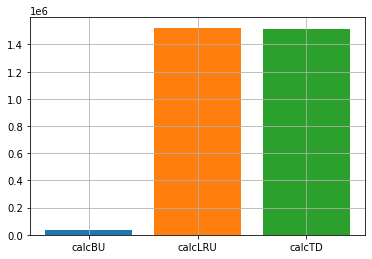

In [18]:
n = 50
funcs = [calcBU, calcLRU, calcTD]

for func in funcs:
    t = timeit(func, n, n_iter=1)
    print(func.__name__, t)
    plt.bar(func.__name__, t)
plt.grid(True)
plt.show()

## Теоретическая задача для самостоятельной проверки: 3-разбиение

Мы хотим разбить данные n натуральных чисел a1,…,an на три части с равной суммой. Например, числа (1,2,3,4,4,5,8) так разбить можно: (1,8), (4,5), (2,3,4), а числа (2,2,3,5) — нет. Приведите алгоритм со временем работы O(nS^2), где S=∑ai.

Решение примерно: если S не делится на 3 - выход, иначе: динамическое программирование - набирать по принципу задачи о рюкзаке?.. Когда-нибуть можно подумать...


In [19]:
import random

n = 10

def getS(n):
    S = [random.randint(1, n) for _ in range(n)]
    x3 = 3 - sum(S) % 3 
    if  x3 != 0:
        S.append(x3)
    S.sort()
    return S
    
getS(n)

def trisect(A):
    if sum(A) % 3 > 0:
        return None
    else:
        
        ...
    
trisect(getS(n))

# <a id='toc7_'></a>[+ Практика: Расстояние редактирования](#toc0_)

In [20]:
# вариант профессионала 
import random
from functools import lru_cache

A = 'short'
B = 'ports'


def edit_distanceTD(s1, s2):
    
    @lru_cache(maxsize=None)    # мемоизатор
    def d(i, j):
        if i == 0 or j == 0:
            return max(i, j)
        else:
            return min(d(i, j - 1) + 1,
                       d(i - 1, j) + 1,
                       d(i - 1, j - 1) + (s1[i - 1] != s2[j - 1]))
        
    return d(len(s1), len(s2))


def edit_distanceBU(s1, s2):
    m, n = len(s1), len(s2)
    if m < n: 
        # тогда будет O(min(n, m)) для curr
        return edit_distanceBU(s2, s1)
    
    prev = list(range(n + 1))
    
    for i, ch1 in enumerate(s1, 1): # номера с 1
        # уйти от ручных индексов -> удобно, наглядно
        curr = [i]
        for j, ch2 in enumerate(s2, 1):
            curr.append(min(curr[-1] + 1,
                            prev[j] + 1, 
                            prev[j - 1] + (ch1 != ch2)))
        prev = curr
            
    return prev[n]


def main():
    s1= A
    s2 = B
    print(edit_distanceBU(s1, s2))
    

def test(n_iter=100):
    for i in range(n_iter):
        length = random.randint(0, 64)      # 1000 -> sys.setrecursionlimit(10000) -> минута времени  
                                            # -> рекурсия даже с кэшем не вариант для больших размеров
        s = "".join(random.choice("01") for _ in range(length))
        
        assert edit_distanceBU(s, '') == edit_distanceBU('', s) == len(s)
        assert edit_distanceBU(s, s) == 0
    
    assert edit_distanceBU("ab", "ab") == 0
    assert edit_distanceBU("short", "ports") == 3


test()